# Portfolio Construction - PSX

## Contents
1. Importing Libraries
2. Importing Data
3. Data Pre-processing
4. Analysis

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


## 4. Analysis

- Computing return from prices by using the percentage change method

In [113]:
returns = prices_sorted.pct_change()

In [114]:
returns.head()

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,0.016000,0.047943,NaN,-0.003640,-0.007148,0.012037,0.006606,0.008533,NaN,0.014493,...,NaN,0.037558,NaN,0.006297,0.045618,-0.011828,0.020976,NaN,NaN,-0.040064
2014-01-03,-0.005906,-0.015025,NaN,-0.004697,0.010079,-0.000636,-0.004004,-0.001867,NaN,-0.004365,...,NaN,-0.016734,NaN,0.049668,0.049370,0.102285,0.002209,NaN,NaN,-0.085142
2014-01-06,0.009901,-0.023090,NaN,0.004457,0.005702,0.000566,0.016938,0.007542,NaN,0.006776,...,NaN,0.049993,NaN,0.049925,-0.006604,-0.014808,-0.000735,NaN,NaN,0.009124
2014-01-07,-0.014161,-0.001574,NaN,-0.007831,-0.008505,-0.003557,0.049967,0.007833,NaN,-0.010293,...,NaN,0.024090,NaN,0.049681,0.015955,-0.024048,-0.000074,0.002959,NaN,0.180832


In [17]:
# Formatting the index to datetime
#returns.index = pd.to_datetime(returns.index, format = '%d-%m-%Y')

In [115]:
# This helps in subsetting by year/month and makes the plots nicer
returns.loc['2024']

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,0.011446,0.010691,0.035415,0.061750,0.003641,0.053658,0.031125,0.042019,0.059121,0.014224,...,0.015065,-0.013384,0.057111,0.044826,0.045356,0.074997,0.036437,0.028354,0.013699,0.038363
2024-01-02,0.006552,-0.020876,-0.021291,0.005788,0.007255,-0.024422,-0.017012,-0.022419,-0.030133,-0.008740,...,-0.009212,-0.031373,-0.014897,-0.018620,-0.026915,0.013765,0.003635,0.071605,0.000000,-0.007389
2024-01-03,-0.011834,0.011155,0.009965,-0.010414,-0.018007,-0.005012,0.022897,-0.005096,-0.014941,0.002050,...,0.002583,0.040833,-0.008955,-0.006455,0.029359,-0.008356,0.000487,-0.023810,0.000000,0.022333
2024-01-04,-0.007186,0.008274,-0.020011,0.015508,-0.011002,0.002118,0.004240,0.021273,0.008618,0.002046,...,-0.002576,0.046191,-0.012216,-0.010926,-0.030755,0.003160,-0.002161,-0.020063,0.002252,0.070388
2024-01-05,0.013148,-0.005880,0.006665,0.025907,0.000824,-0.009125,0.000420,-0.015696,-0.018797,0.012048,...,0.002583,0.044885,-0.002895,-0.013635,0.003240,-0.008283,-0.005577,-0.020072,-0.006742,-0.024943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-24,0.003861,-0.013701,-0.002099,-0.007879,0.014414,0.014110,-0.001246,0.022174,0.007431,0.028544,...,-0.008342,0.002959,0.005027,0.010537,0.010541,-0.012344,0.035738,0.000753,0.000000,-0.018088
2024-05-27,-0.002834,-0.005101,-0.030890,0.013235,-0.009769,-0.004596,-0.007594,0.004333,-0.010713,-0.020155,...,-0.009989,0.028378,0.011435,-0.009472,0.000045,-0.000158,-0.002030,0.020684,0.000000,-0.023684
2024-05-29,0.009035,-0.002645,-0.016223,0.006096,-0.003587,0.002008,-0.007953,-0.016742,-0.018463,-0.009652,...,-0.005311,0.050103,-0.007452,-0.017107,-0.018270,-0.013291,0.000090,-0.007369,-0.001442,-0.051213


In [116]:
returns.loc['2024']['APL']

Date
2024-01-01    0.053658
2024-01-02   -0.024422
2024-01-03   -0.005012
2024-01-04    0.002118
2024-01-05   -0.009125
                ...   
2024-05-24    0.014110
2024-05-27   -0.004596
2024-05-29    0.002008
2024-05-30   -0.000701
2024-05-31   -0.000551
Name: APL, Length: 102, dtype: float64

- Visualising a sample

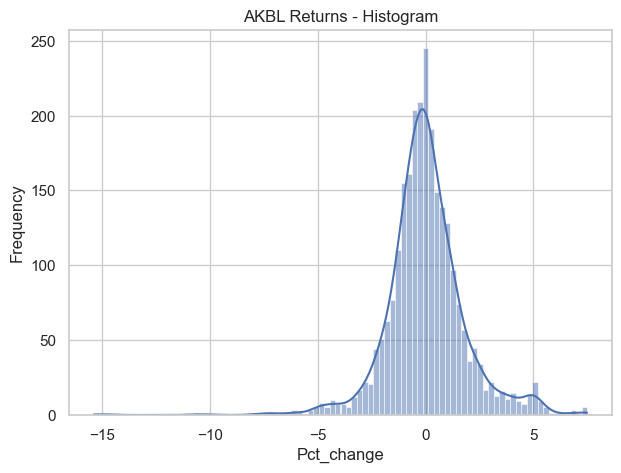

In [117]:
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
sns.histplot(returns['AKBL']*100,kde=True)
plt.title('AKBL Returns - Histogram')
plt.xlabel('Pct_change')
plt.ylabel('Frequency')
plt.show()

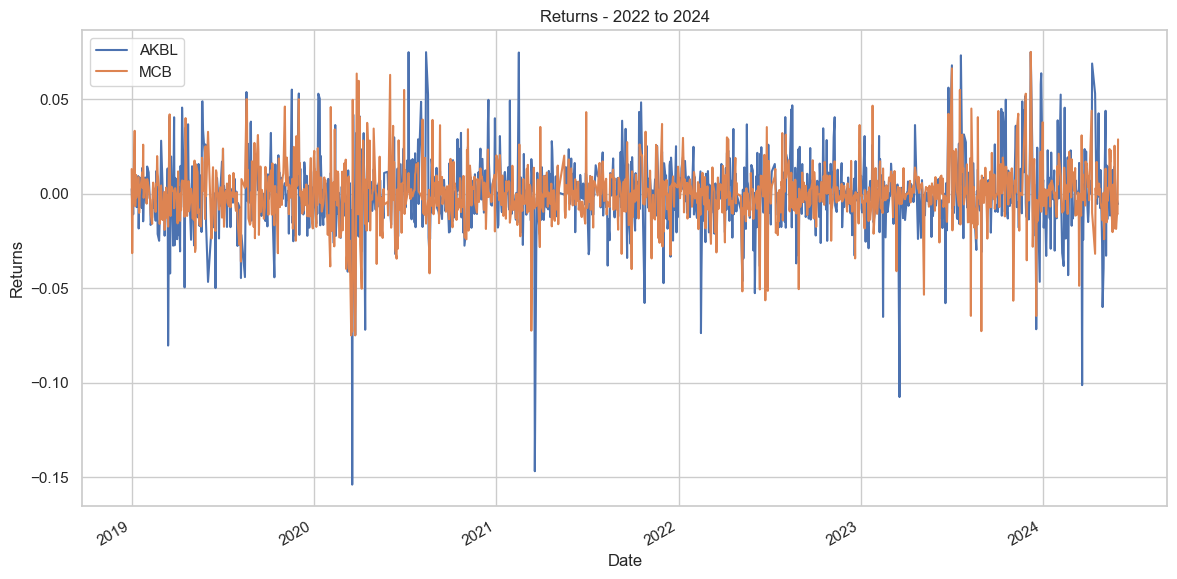

In [130]:
# Plot over time

plt.figure(figsize=(14,7))
returns.loc['2019':'2024']['AKBL'].plot()
returns.loc['2019':'2024']['MCB'].plot()

#plt.scatter(x=returns.index,y=returns['AKBL'])
#sns.barplot(x=returns.index,y=returns['AKBL'])
plt.title('Returns - 2022 to 2024')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [119]:
# Checking the range of the data
print('from  '+str(returns.index.min()))
print('to  '+str(returns.index.max()))

from  2014-01-01 00:00:00
to  2024-05-31 00:00:00


#### Metrics
- Pct_change for Returns
- Account for Dividens in Pct_change
- Multi-period and Annualized Returns
- Variance and Standard Deviation - Annualized
- Sharpe Ratio
- Max Drawdown
- Calmar Ratio
- Skewness, Kurtosis and Jarque-Beta
- VaR and CVaR

In [120]:
returns.std()

Name
ABL      0.015793
ABOT     0.018808
AGP      0.023270
AICL     0.019337
AKBL     0.018385
           ...   
TRG      0.032086
UBL      0.017655
UNITY    0.027047
UPFL     0.019752
YOUW     0.049069
Length: 100, dtype: float64

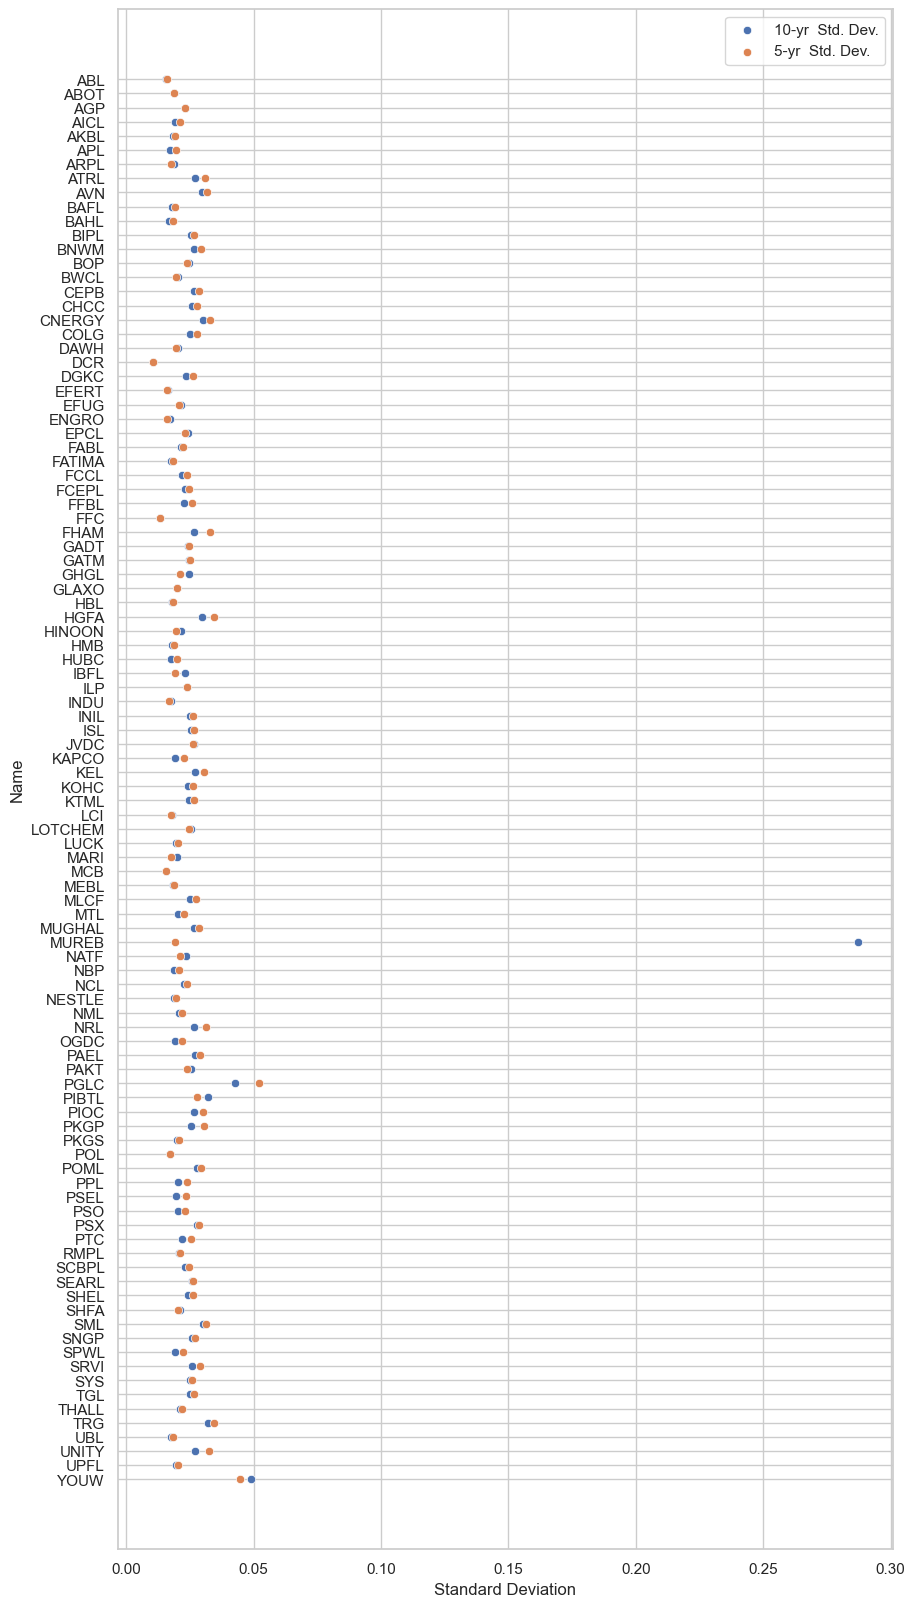

In [121]:
plt.figure(figsize=(10,20))
sns.scatterplot(y= returns.std().index,x=returns.std(),label='10-yr  Std. Dev.')
sns.scatterplot(y= returns['2019':'2024'].std().index,x=returns['2019':'2024'].std(),label='5-yr  Std. Dev.')
plt.xlabel('Standard Deviation')
plt.legend()
plt.show()

In [131]:
# we check return per risk (this is not entirely accurate because std() is over all the years, 
# later we should set a period for better analysis e.g. annualised return and annualised risk)

returns_adj = returns/returns.std()


In [134]:
# AKBL and AKBL adjusted have the same label, so we change the col names in the new df 

returns_adj.columns = returns_adj.columns + '_adj'
    

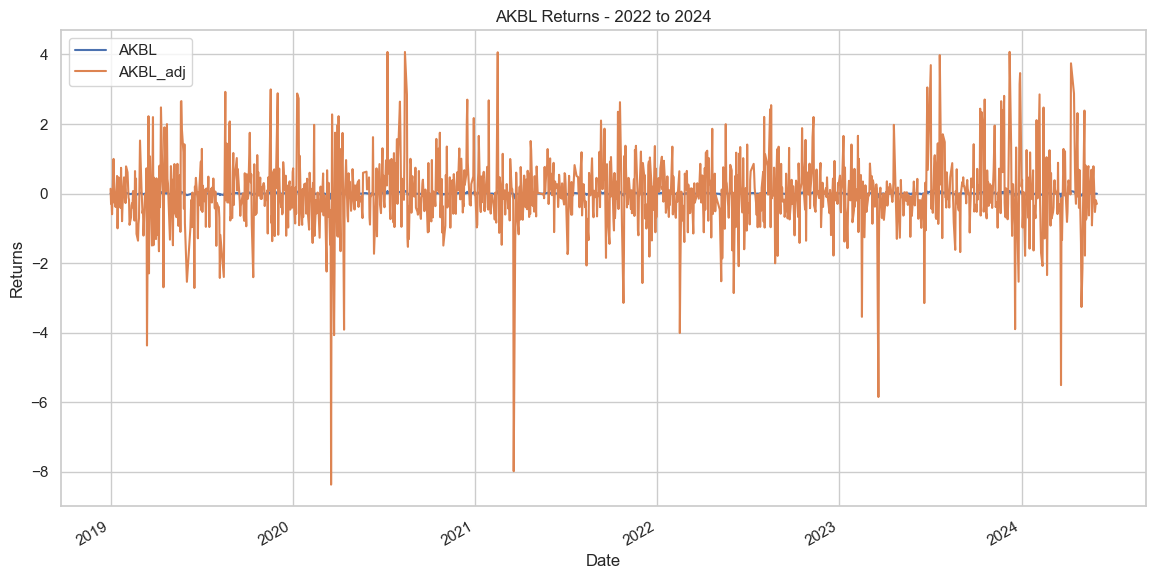

In [135]:
plt.figure(figsize=(14,7))
returns.loc['2019':'2024']['AKBL'].plot()
returns_adj.loc['2019':'2024']['AKBL_adj'].plot()

#plt.scatter(x=returns.index,y=returns['AKBL'])
#sns.barplot(x=returns.index,y=returns['AKBL'])
plt.title('AKBL Returns - 2022 to 2024')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

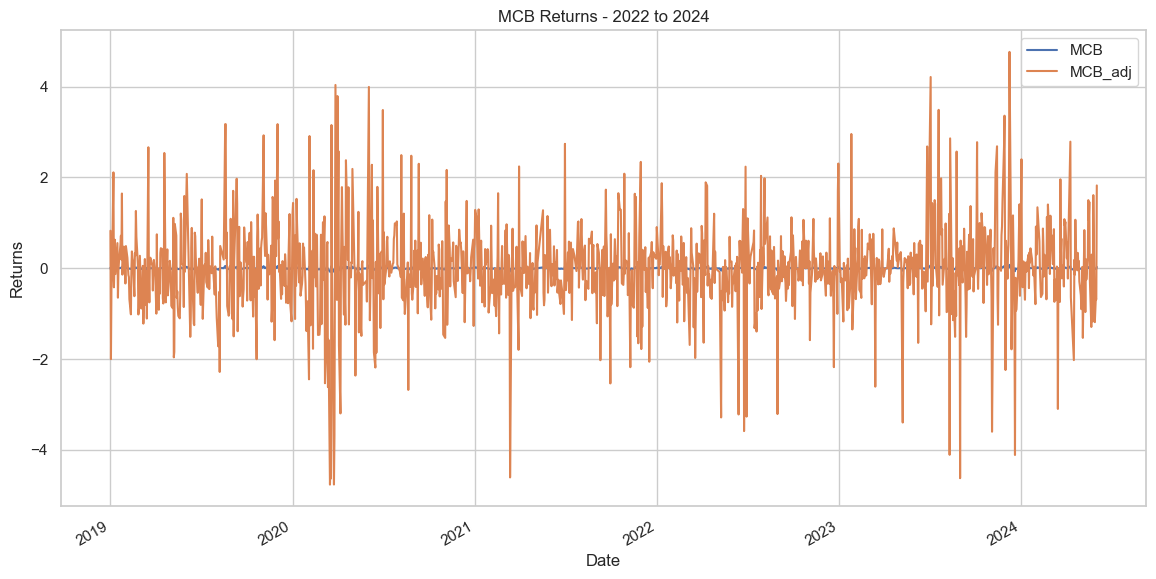

In [137]:
plt.figure(figsize=(14,7))
returns.loc['2019':'2024']['MCB'].plot()
returns_adj.loc['2019':'2024']['MCB_adj'].plot()

#plt.scatter(x=returns.index,y=returns['AKBL'])
#sns.barplot(x=returns.index,y=returns['AKBL'])
plt.title('MCB Returns - 2022 to 2024')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Coursera 

## Contents
1. Compounding/Annualisation

## Compounding/Annualisation

In [145]:
all_compound = np.prod(returns+1)-1

In [150]:
twoyr_compound = np.prod(returns.loc['2022':'2024']+1)-1
c2024 = np.prod(returns.loc['2024']+1)-1
c2023 = np.prod(returns.loc['2023']+1)-1
c2022 = np.prod(returns.loc['2022']+1)-1
c2021 = np.prod(returns.loc['2021']+1)-1
c2020 = np.prod(returns.loc['2020']+1)-1
c2019 = np.prod(returns.loc['2019']+1)-1
c2018 = np.prod(returns.loc['2018']+1)-1
c2017 = np.prod(returns.loc['2017']+1)-1
c2016 = np.prod(returns.loc['2016']+1)-1



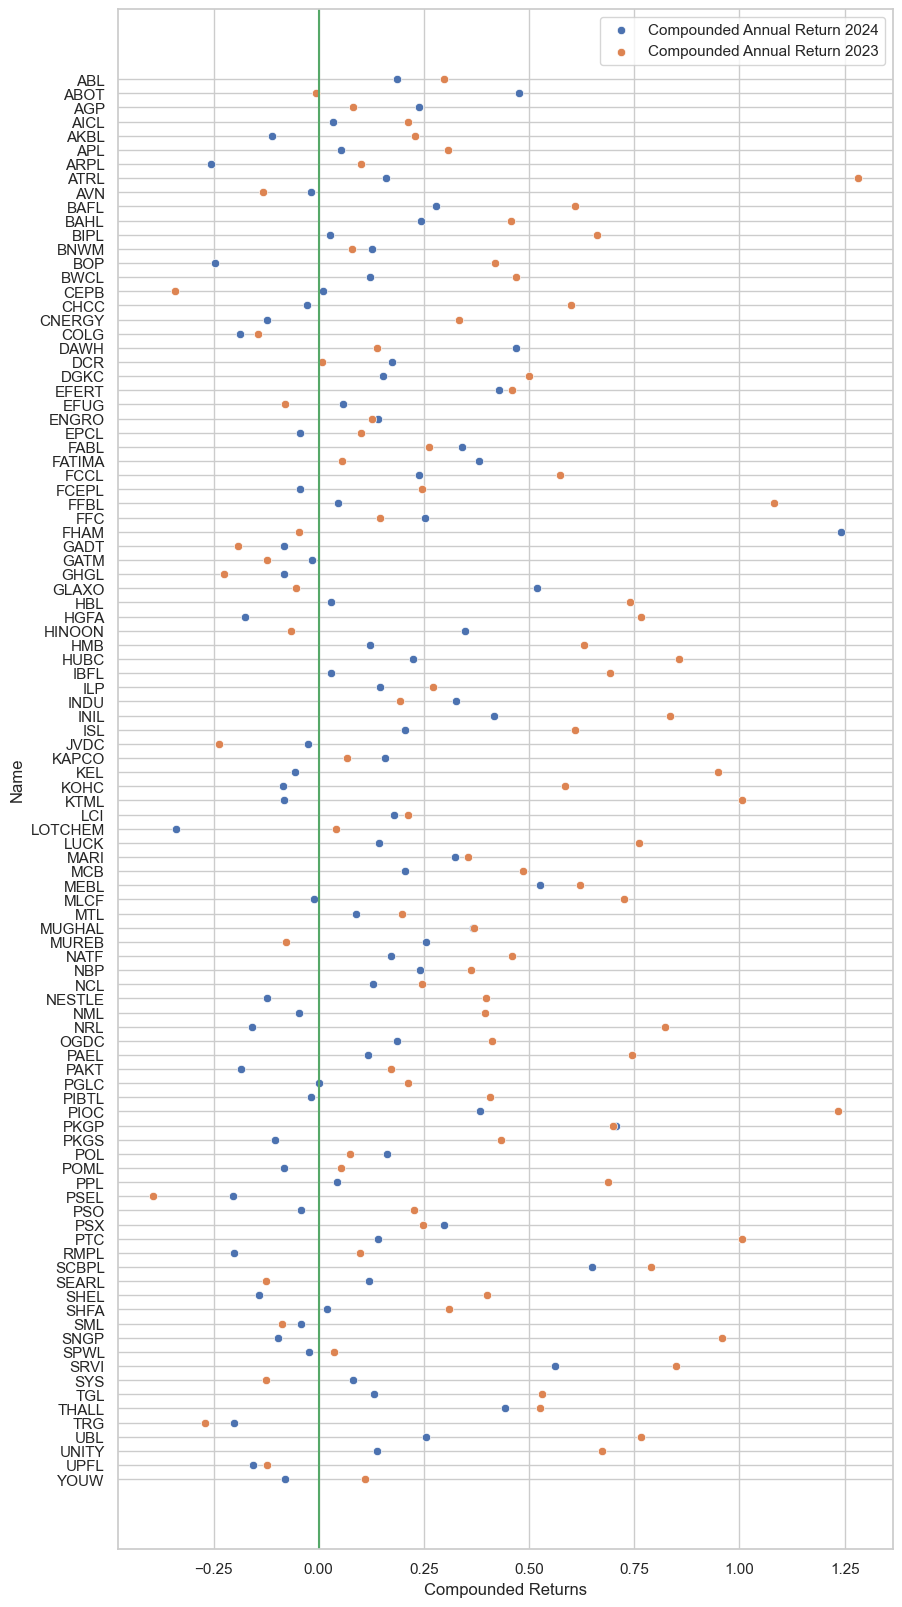

In [157]:
plt.figure(figsize=(10,20))
#sns.scatterplot(y= all_compound.index,x=all_compound,label='Compounded Return 2014-2024')
#sns.scatterplot(y= twoyr_compound.index,x=twoyr_compound,label='Compounded Return 2022-2024')
sns.scatterplot(y= c2024.index,x=c2024,label='Compounded Annual Return 2024')
sns.scatterplot(y= c2023.index,x=c2023,label='Compounded Annual Return 2023')
#sns.scatterplot(y= c2022.index,x=c2022,label='Compounded Annual Return 2022')
#sns.scatterplot(y= c2021.index,x=c2021,label='Compounded Annual Return 2021')
#sns.scatterplot(y= c2020.index,x=c2020,label='Compounded Annual Return 2020')
#sns.scatterplot(y= c2019.index,x=c2019,label='Compounded Annual Return 2019')


#sns.scatterplot(y= returns['2019':'2024'].std().index,x=returns['2019':'2024'].std(),label='5-yr  Std. Dev.')
plt.axvline(x = 0, color = 'g')
plt.xlabel('Compounded Returns')
plt.legend()
plt.show()

In [220]:
returns.loc['2024-05'].shape[0]

21

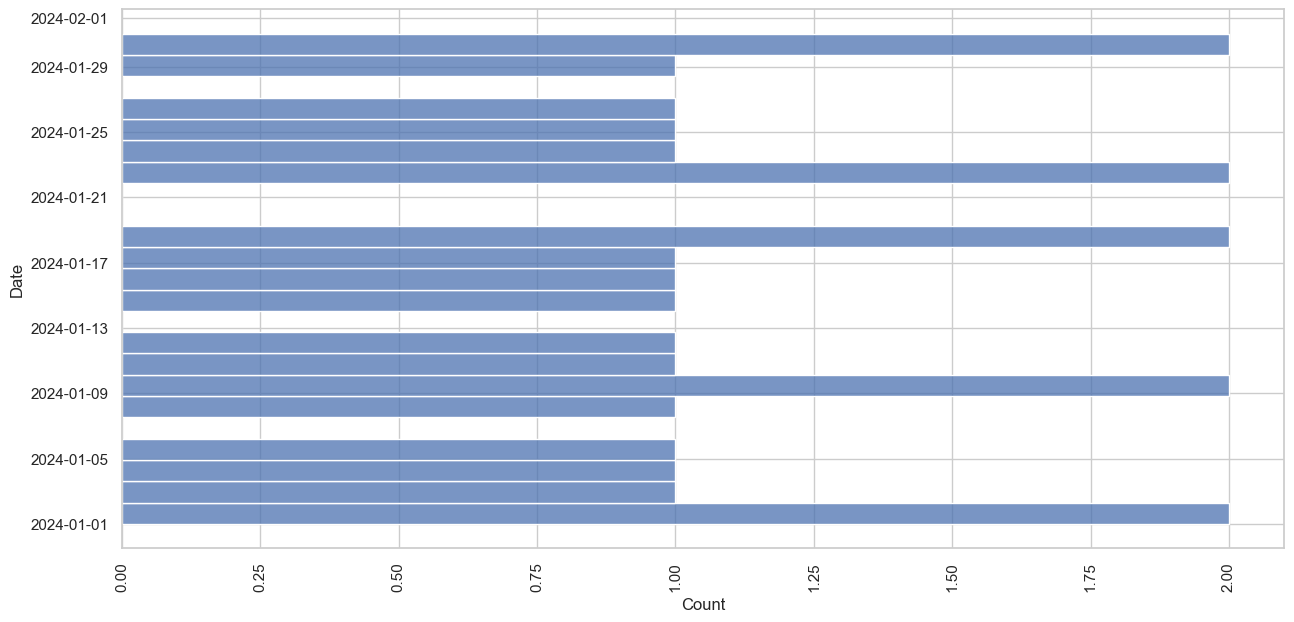

In [182]:
# We want to see Annualised Returns 
# First we have to check the granularity of our data

sns.set(style="whitegrid")
plt.figure(figsize=(15,7))
sns.histplot(y=returns.loc['2024-01'].index,bins=returns.loc['2024-01'].index.size)
plt.xticks(rotation=90)
plt.show()

In [276]:
data = {"Month":[],"Entry":[]}
entry = pd.DataFrame(data)
year = 2014
n=1
month = str(year)+'-'+str(n)
num = returns.loc[month].shape[0]
newrow = pd.DataFrame({"Month":[month],"Entry":[num]})
entry = pd.concat([entry,newrow],ignore_index=True)
entry

,Month,Entry
0,2014-1,22.0


In [280]:
#You're writing a function to check the number of entries per month
entries = pd.DataFrame({"Month":[],"Entry":[]})

for year in range(2014,2025):
    for n in range(1,13):
        try:
            month = str(year)+'-'+str(n)
            num = returns.loc[month].shape[0]
            #new_entry = pd.DataFrame({"Month":[month],"Entry":[num]})
            #entries = pd.concat([entries,new_entry],ignore_index=True)
            entries.loc[len(entries)] = [month,num]
        
            #print('Month '+month+' has '+str(num)+' entries')
        except Exception as e:
            print('Month'+str(e)+' not found')
        
 

Month'2024-6' not found
Month'2024-7' not found
Month'2024-8' not found
Month'2024-9' not found
Month'2024-10' not found
Month'2024-11' not found
Month'2024-12' not found


<AxesSubplot: >

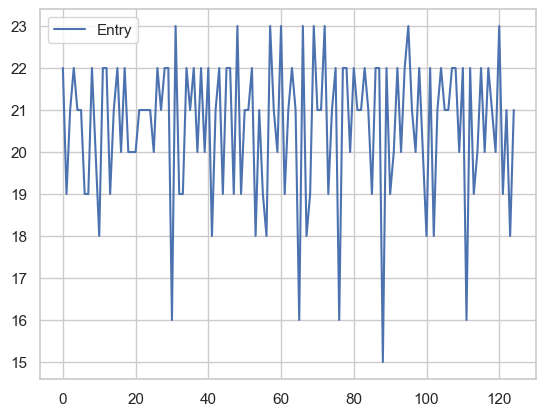

In [286]:
#we check the number of entries in each month
entries.plot()

In [308]:
#Next we want to check the monthly, annualised, average returns of these stocks
#returns_p = pd.DataFrame(returns.columns)


,Name,20141


In [302]:
np.prod((returns.loc['2024-01'][returns.columns[1]])+1)-1

-0.13061428478303394

In [336]:
returns_p = pd.DataFrame({"Name":[]})

returns_p[month]=[]
returns_p.loc[len(returns_p)] = [1,2]
returns_p = returns_p.assign(month=[1])
returns_p = returns_p.assign(month2=[2])

returns_p.shape[0]*1

1

In [350]:
returns_p = pd.DataFrame(columns=returns.columns)
#returns_p.columns = returns.columns
returns_p.loc[len(returns_p)]=1
returns_p

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [405]:
returns_o = pd.DataFrame()
ret = np.prod(returns.loc['2024-01']+1)-1
a = pd.DataFrame({'Name':ret.index,'returns':ret})

returns_o = pd.concat([returns_o,a],axis=1)
returns_o=returns_o.set_index('Name')

ret2 = np.prod(returns.loc['2024-02']+1)-1
a2 = pd.DataFrame({'Name':ret2.index,'returns2':ret2})
a2 = a2.set_index('Name')

returns_o = pd.concat([returns_o,a2],axis=1)
returns_o
#returns_o.set_index('Name')
#ret2

,returns,returns2
Name,,
ABL,0.036145,0.008488
ABOT,-0.130614,0.182829
AGP,-0.061442,0.152447
AICL,0.074920,-0.016063
AKBL,-0.046926,-0.005942
...,...,...
TRG,-0.120400,0.042128
UBL,0.023729,0.055861
UNITY,-0.156157,0.185055


In [421]:
#for year in range(2014,2025):
#year = 2024
#This data frame gives us monthly returns obtained by compounding the daily returns for each month
returns_p = pd.DataFrame()

for year in range(2014,2025):
    
    for n in range(1,13):
        month = str(year)+'-'+str(n)
        
        try:
            #new_row = {i:[]}    
            ret = np.prod(returns.loc[month]+1)-1
            a = pd.DataFrame({'Name':ret.index,month:ret})
            returns_p = pd.concat([returns_p,a],axis=1)
            returns_p=returns_p.set_index('Name')
            #returns_p = pd.DataFrame({'Name':ret.index,month:ret})
                
                #new_entry = pd.DataFrame({"Month":[month],"Entry":[num]})
                #entries = pd.concat([entries,new_entry],ignore_index=True)
            
        
            #print('Month '+month+' has '+str(num)+' entries')
        except Exception as e:
            print('Month'+str(e)+' not found')

Month'2024-6' not found
Month'2024-7' not found
Month'2024-8' not found
Month'2024-9' not found
Month'2024-10' not found
Month'2024-11' not found
Month'2024-12' not found


In [422]:
returns_p

,2014-1,2014-2,2014-3,2014-4,2014-5,2014-6,2014-7,2014-8,2014-9,2014-10,...,2023-8,2023-9,2023-10,2023-11,2023-12,2024-1,2024-2,2024-3,2024-4,2024-5
Name,,,,,,,,,,,,,,,,,,,,,
ABL,-0.011111,-0.006067,9.574949e-02,0.297328,0.055746,0.035026,-0.097591,-0.128548,4.636313e-02,5.430264e-02,...,-0.028108,0.007338,0.076989,0.113793,-0.011669,0.036145,0.008488,-0.008532,1.512967e-01,-0.004646
ABOT,-0.017459,-0.063256,1.470999e-01,0.232706,0.138969,-0.027295,0.033722,-0.123153,1.689799e-01,1.655618e-02,...,-0.081869,-0.042936,0.143213,0.197529,-0.027040,-0.130614,0.182829,0.011791,1.808575e-01,0.201280
AGP,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,-0.200835,0.029037,0.194884,0.207951,-0.011111,-0.061442,0.152447,-0.024063,7.113985e-02,0.095597
AICL,0.029121,0.051541,1.278232e-01,0.021517,0.013556,-0.058230,0.097007,-0.068711,2.266895e-02,-4.684233e-02,...,0.016079,-0.037710,0.103219,0.090390,-0.006108,0.074920,-0.016063,-0.047039,5.023229e-02,-0.022947
AKBL,0.003574,-0.027778,2.710623e-01,0.071470,0.040344,-0.017063,0.140452,-0.090406,9.279919e-02,3.109049e-02,...,-0.074553,0.037949,0.172547,0.201313,0.125683,-0.046926,-0.005942,-0.118275,1.152542e-01,-0.045158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRG,0.101075,0.411133,-3.321799e-02,-0.000716,0.083095,-0.072090,-0.024947,-0.228070,9.375000e-02,-1.160173e-01,...,-0.153115,-0.011567,-0.207680,0.166906,-0.028385,-0.120400,0.042128,-0.045116,-7.513365e-02,-0.014217
UBL,0.007368,-0.005075,2.139374e-01,0.135142,-0.010724,-0.072470,0.155316,-0.077231,4.808013e-02,4.385685e-02,...,-0.084091,0.032425,0.167201,0.083050,-0.020327,0.023729,0.055861,-0.051761,6.237656e-02,0.153266
UNITY,0.009862,-0.001953,-3.330669e-16,-0.003914,-0.008841,-0.000991,-0.004960,0.000997,-2.220446e-16,-1.110223e-16,...,-0.140850,0.112240,-0.043703,0.073951,-0.085880,-0.156157,0.185055,-0.006771,6.689391e-02,0.074281


## 2. Importing Data

- The data is stored as separate csv files (for separate stocks) in one folder.
- We import one sample file to take a look 

In [2]:
sample = pd.read_csv('C:/Users/humaa/Documents/Portfolio Construction/Data Download - Kaggle/PSX_100_index_trading_data_2014-2024/PSX 100 index/ABL.csv')

In [3]:
# Brief look at the sample data
sample.head()

,Date,trading_open,trading_high,trading_low,trading_close,trading_vol,trading_change
0,31-05-2024,99.90,99.90,98.1,98.54,5411,0.25
1,30-05-2024,99.20,99.20,98.0,98.29,47206,-1.11
2,29-05-2024,99.47,99.47,98.0,99.40,86683,0.89
3,27-05-2024,98.90,99.25,98.1,98.51,47538,-0.28
4,24-05-2024,98.00,99.50,98.0,98.79,53000,0.38


- Since there are numerous files, we need to find a way to import and store them together

In [84]:
path = 'C:/Users/humaa/Documents/Portfolio Construction/Data Download - Kaggle/PSX_100_index_trading_data_2014-2024/PSX 100 index'
import glob
files = glob.glob(path+'/*.csv')

import os
prices = pd.DataFrame()
for f in files:
    x = pd.read_csv(f)
    x['Name']=os.path.basename(f)[:-4]
    prices = pd.concat([prices,x])

In [85]:
# Take a look at the prices data
prices.head()

,Date,trading_open,trading_high,trading_low,trading_close,trading_vol,trading_change,Name
0,31-05-2024,99.90,99.90,98.1,98.54,5411,0.25,ABL
1,30-05-2024,99.20,99.20,98.0,98.29,47206,-1.11,ABL
2,29-05-2024,99.47,99.47,98.0,99.40,86683,0.89,ABL
3,27-05-2024,98.90,99.25,98.1,98.51,47538,-0.28,ABL
4,24-05-2024,98.00,99.50,98.0,98.79,53000,0.38,ABL


In [6]:
prices.describe()

,trading_open,trading_high,trading_low,trading_close,trading_vol,trading_change
count,235573.000000,235573.000000,235573.000000,235573.000000,2.355730e+05,235573.000000
mean,350.702129,355.002479,347.050932,351.182652,1.520576e+06,0.256015
std,1291.312130,1304.466358,1282.525063,1295.080151,5.101625e+06,38.438953
min,1.240000,1.330000,1.230000,1.310000,0.000000e+00,-1800.000000
25%,30.800000,31.250000,30.300000,30.780000,2.170000e+04,-0.820000
50%,81.010000,82.350000,80.000000,81.040000,2.268000e+05,-0.010000
75%,225.000000,228.140000,221.100000,224.640000,1.139000e+06,0.840000
max,26000.000000,26000.000000,26000.000000,26000.000000,4.811199e+08,1800.000000


In [7]:
prices.info

<bound method DataFrame.info of             Date  trading_open  trading_high  trading_low  trading_close  \
0     31-05-2024         99.90         99.90        98.10          98.54   
1     30-05-2024         99.20         99.20        98.00          98.29   
2     29-05-2024         99.47         99.47        98.00          99.40   
3     27-05-2024         98.90         99.25        98.10          98.51   
4     24-05-2024         98.00         99.50        98.00          98.79   
...          ...           ...           ...          ...            ...   
2358  07-01-2014          5.80          6.53         5.80           6.53   
2359  06-01-2014          5.74          5.75         5.42           5.53   
2360  03-01-2014          5.90          5.90         5.38           5.48   
2361  02-01-2014          6.42          6.42         5.76           5.99   
2362  01-01-2014          5.59          6.24         5.50           6.24   

      trading_vol  trading_change  Name  
0            

## 3. Data Pre-processing

- The data is stacked vertically. We want to change that. We are only interested in the closing price of each stock and it is better to have the columns to represent the closing prices for each stock.
- We can use the .pivot() method

- The operation below returns an error, because the 'Date' column contains duplicate entries of 'Name' for the same date. We remove these dupllicates.

``` prices.pivot(columns='Name',values='trading_close',index='Date') ```


In [86]:
# Checking the number of duplicates
prices_no_dup = prices.loc[:,['Date','Name']].drop_duplicates()
prices.shape[0] - prices_no_dup.shape[0]

189

- You want to select only those rows where the 189 duplicates don't exist
- Try to reverse the boolean you get from duplicated()

In [87]:
prices.loc[:,['Date','Name']].duplicated().sum()


189

In [88]:
~prices.loc[:,['Date','Name']].duplicated()

0       True
1       True
2       True
3       True
4       True
        ... 
2358    True
2359    True
2360    True
2361    True
2362    True
Length: 235573, dtype: bool

- This expression ~sample_a.loc[:,['Date','Name']].duplicated() gives you true in those indices where there are no duplicates
- You use these indices to subset from the original sample_a

In [97]:
prices_uni = prices[~prices.loc[:,['Date','Name']].duplicated().values]

- Check if it removed all the unwanted rows

In [90]:
prices.shape[0] - prices_uni.shape[0]

189

In [101]:
prices_uni['Date'] = pd.to_datetime(prices_uni['Date'], format = '%d-%m-%Y')

C:\Users\humaa\AppData\Local\Temp\ipykernel_19256\3127098628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices_uni['Date'] = pd.to_datetime(prices_uni['Date'], format = '%d-%m-%Y')


In [102]:
prices_uni.head()

,Date,trading_open,trading_high,trading_low,trading_close,trading_vol,trading_change,Name
0,2024-05-31,99.90,99.90,98.1,98.54,5411,0.25,ABL
1,2024-05-30,99.20,99.20,98.0,98.29,47206,-1.11,ABL
2,2024-05-29,99.47,99.47,98.0,99.40,86683,0.89,ABL
3,2024-05-27,98.90,99.25,98.1,98.51,47538,-0.28,ABL
4,2024-05-24,98.00,99.50,98.0,98.79,53000,0.38,ABL


In [103]:
prices_cl = prices_uni.pivot(columns='Name',values='trading_close',index='Date')

<p style="font-family: Arial; font-size:1.4em;color:cyan;"> Success :) </p>



In [104]:
prices_cl.head()

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,90.00,396.93,NaN,38.46,13.99,419.53,267.94,169.92,NaN,24.84,...,NaN,525.86,NaN,25.41,144.90,9.30,133.01,NaN,NaN,6.24
2014-01-02,91.44,415.96,NaN,38.32,13.89,424.58,269.71,171.37,NaN,25.20,...,NaN,545.61,NaN,25.57,151.51,9.19,135.80,NaN,NaN,5.99
2014-01-03,90.90,409.71,NaN,38.14,14.03,424.31,268.63,171.05,NaN,25.09,...,NaN,536.48,NaN,26.84,158.99,10.13,136.10,NaN,NaN,5.48
2014-01-06,91.80,400.25,NaN,38.31,14.11,424.55,273.18,172.34,NaN,25.26,...,NaN,563.30,NaN,28.18,157.94,9.98,136.00,10.14,NaN,5.53
2014-01-07,90.50,399.62,NaN,38.01,13.99,423.04,286.83,173.69,NaN,25.00,...,NaN,576.87,NaN,29.58,160.46,9.74,135.99,10.17,9300.0,6.53


In [105]:
prices_sorted = prices_cl.sort_index(inplace=False)

In [106]:
prices_sorted.head()

Name,ABL,ABOT,AGP,AICL,AKBL,APL,ARPL,ATRL,AVN,BAFL,...,SPWL,SRVI,SYS,TGL,THALL,TRG,UBL,UNITY,UPFL,YOUW
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,90.00,396.93,NaN,38.46,13.99,419.53,267.94,169.92,NaN,24.84,...,NaN,525.86,NaN,25.41,144.90,9.30,133.01,NaN,NaN,6.24
2014-01-02,91.44,415.96,NaN,38.32,13.89,424.58,269.71,171.37,NaN,25.20,...,NaN,545.61,NaN,25.57,151.51,9.19,135.80,NaN,NaN,5.99
2014-01-03,90.90,409.71,NaN,38.14,14.03,424.31,268.63,171.05,NaN,25.09,...,NaN,536.48,NaN,26.84,158.99,10.13,136.10,NaN,NaN,5.48
2014-01-06,91.80,400.25,NaN,38.31,14.11,424.55,273.18,172.34,NaN,25.26,...,NaN,563.30,NaN,28.18,157.94,9.98,136.00,10.14,NaN,5.53
2014-01-07,90.50,399.62,NaN,38.01,13.99,423.04,286.83,173.69,NaN,25.00,...,NaN,576.87,NaN,29.58,160.46,9.74,135.99,10.17,9300.0,6.53


In [107]:
# Visualising the date values
index_values = prices_sorted.index.values

In [108]:
index_values.ndim

1

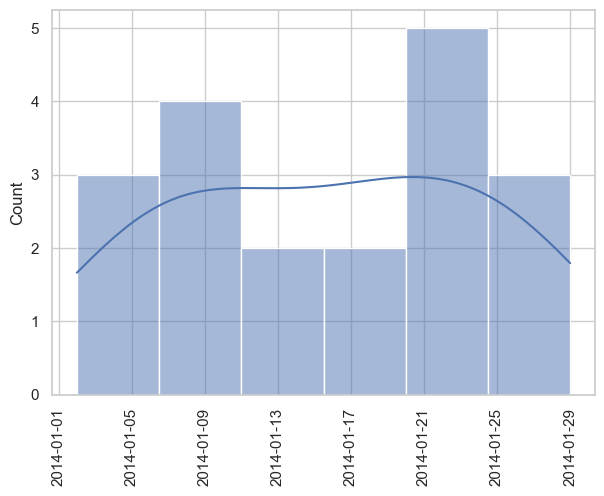

In [112]:
# The following plot shows that our date values are not sorted properly, and this messes up the pct_change formula
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
sns.histplot(index_values[1:20],kde=True)
plt.xticks(rotation=90)
plt.show()

In [82]:
# Should change the format to Date_Time
#pd.to_datetime(prices_cl.index, format = '%d-%m-%Y')

DatetimeIndex(['2014-01-01', '2015-01-01', '2016-01-01', '2018-01-01',
               '2019-01-01', '2020-01-01', '2021-01-01', '2024-01-01',
               '2016-02-01', '2017-02-01',
               ...
               '2018-10-31', '2019-10-31', '2022-10-31', '2023-10-31',
               '2014-12-31', '2015-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=2579, freq=None)

In [74]:
#prices_sorted2 = prices_cl.sort_index(inplace=False)

In [80]:
#prices_cl.index.sort_values()

Index(['01-01-2014', '01-01-2015', '01-01-2016', '01-01-2018', '01-01-2019',
       '01-01-2020', '01-01-2021', '01-01-2024', '01-02-2016', '01-02-2017',
       ...
       '31-10-2018', '31-10-2019', '31-10-2022', '31-10-2023', '31-12-2014',
       '31-12-2015', '31-12-2018', '31-12-2019', '31-12-2020', '31-12-2021'],
      dtype='object', name='Date', length=2579)